<a href="https://colab.research.google.com/github/comp3ngrBasit/BWT-Data-engineering-/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
print("ok")

ok


In [3]:
house_price_dataset = sklearn.datasets.fetch_california_housing() # sklearn ka  builtin datasets jahan say  downloded howa ha this  data set bacially imported
print("ok")


ok


In [4]:
house_df = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
# is giving names to the columns of the table (DataFrame).
# The names come from house_price_dataset.feature_names, which is just a list of labels — like titles for each column.
house_df['price'] = house_price_dataset.target      # new column name add ho rha ah house_df main jis main (jo hum na pridict karni hain )
house_df.isnull().sum                               # total num values kitni hain
correlation = house_df.corr()                       # corelation find kar rahy hain ....
# correlation hota kya ha ???   2 cheezin kitna closly related hain batati hain in simple words
print('ok')

ok


<Axes: >

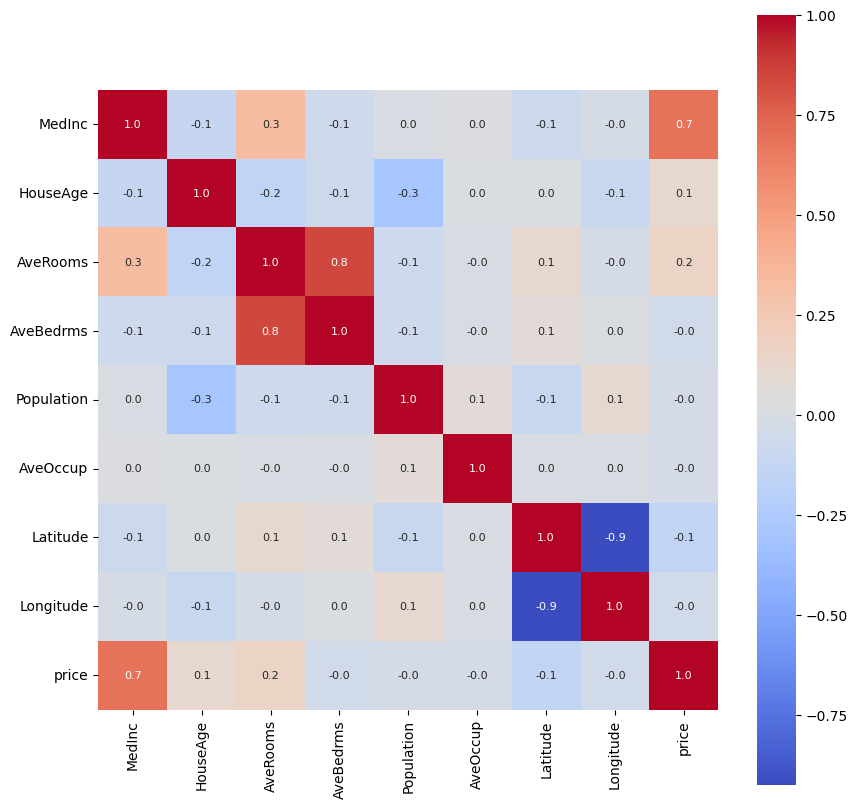

In [5]:
plt.figure(figsize=(10,10))## 10 10 ki length or width define kar li ha
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='viridis') # ya hiuse kar sakty ho ya zatda important nahi ha ya to GPT bhi kar da ga
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues') # ya bhi use kar sakty ho

ok


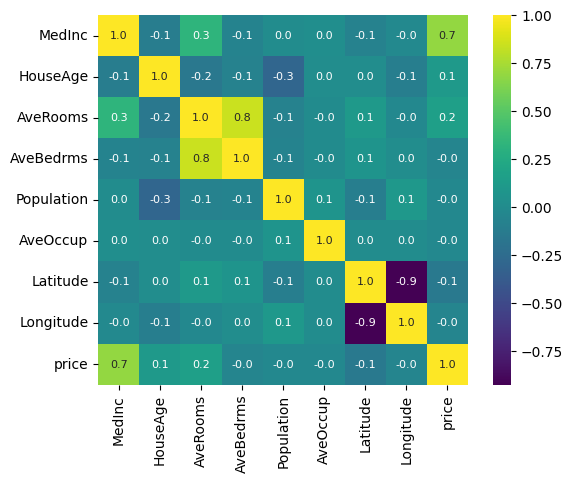

In [6]:
# data ko split kar deya ha x or y nmain
# acha ab ya hum drop q kar rahy hain ????
# dakho tum na price pridict karni ha ana ??? to is ko drop kar do or kis base per karni ha baki sab columns ki base per
X = house_df.drop(['price'], axis=1)       # the things we know
Y = house_df['price']                      #the thing we want to predict (price)

# drop is leya karwana ha aa q kay jab modle train ho raha ho ga or us ko price mily gi to cheating kinda cheez hojaye gi
#because the model would already see the answer while trying to learn how to predict it.
print("ok")

In [7]:
# phaly to hum na house df bana leya tha laqin is main actual chee to drop karwa di ha na ???
# laqin is maina ba actual value he nahi ha (actual prices)
house_df['price'] = house_price_dataset.target
print('ok')

ok


In [8]:
# ya important ha
# train test split modlw use ho raha ha
# sklearn.model_selection yahan say lay rahy hain ya modle

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# x train or y train modle ko train karty hain (80% data per )
#x test or y test (20%) ya test ka data modle ko nazar nahi ata simple words main is main hum check karty hain ky modle kuch seek bhi raha ha ya nahi

# random_state=2 ya  sets karta ha  seed so the split is always the same every time jab hum code run karin.


In [9]:
house_df.describe()# ya mety df ko describe kart ha wasy is ki koi zarort nahi ha
model = XGBRegressor()
# main ya q use kar raha hon ::
# XGBoost is very efficient and performs well on a variety of datasets.
# complex relations ko handle kar leta ha
# thora sa fast ha or linear relations kay leya acha ha
# ab liner relations or baki sab kya hoty hain ya phar lena
model.fit(X_train, Y_train)    # modle ko bata a kay train kahan say hona ha(from traning data)
#(Xtrain) ya features hain jasa kay rooms , location etc
#(ytrain) ya actual target ha jo hum pridict kar rahy hain

# bohat say decision trees bany gain
# Gradient Boosting say ya modle ya traning improve hoti jaye gi


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
training_data_prediction = model.predict(X_train) # yahan per pridication sho rahi hain
# yahan per hum dakhty hain kay modle na kitna acha seekh ha pridication or actual main farq kitna ha

In [16]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

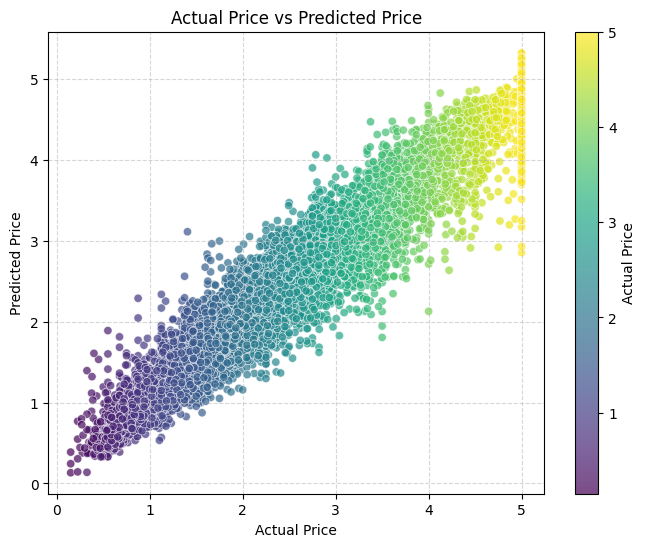

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(Y_train,training_data_prediction,c=Y_train,cmap='viridis',alpha=0.7,edgecolors='w',linewidth=0.5,marker='o' )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.colorbar(scatter, label='Actual Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [19]:
test_data_prediction = model.predict(X_test) # Accuracy to pridict the resukts on the test data

In [ ]:
score_1 = metrics.r2_score(Y_test, test_data_prediction) # R saqured error

In [20]:
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.943650140819218
Mean Absolute Error: 0.3108631800268186
